## Work to be done 

● Delete all non-wind-related and time-related features from your dataset

● Extract a sub-dataset corresponding to exactly one year

● Plot the three wind-related features as a function of time spanning the
whole year

● Calculate the number of hours during which the wind was not blowing

● Plot the monthly-averaged wind-related features as a function of the
number of the month

● Plot the wind speed distribution at 10m and 100m above the ground

● Find the parameters of the Weibull distribution that seems to fit best your data


In [121]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [110]:
df = pd.read_csv('paris.csv')

In [111]:
df.index = range(1, 175345)

In [112]:
df.head()

,air_temp,albedo,azimuth,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dewpoint_temp,dhi,...,snow_water_equivalent,snow_soiling_rooftop,snow_soiling_ground,wind_direction_100m,wind_direction_10m,wind_speed_100m,wind_speed_10m,zenith,period_end,period
1,6,0.14,-11,0,0,0,0,0.0,4.9,0,...,0.0,0,0,216,211,8.8,4.7,154,2014-01-01T00:30:00Z,PT30M
2,6,0.14,-26,0,0,0,0,0.0,4.8,0,...,0.0,0,0,216,210,8.7,4.5,152,2014-01-01T01:00:00Z,PT30M
3,6,0.14,-39,0,0,0,0,0.0,4.7,0,...,0.0,0,0,215,209,8.7,4.5,150,2014-01-01T01:30:00Z,PT30M
4,6,0.14,-50,0,0,0,0,0.0,4.6,0,...,0.0,0,0,213,207,8.8,4.6,146,2014-01-01T02:00:00Z,PT30M
5,6,0.14,-60,0,0,0,0,0.0,4.6,0,...,0.0,0,0,211,206,8.8,4.7,142,2014-01-01T02:30:00Z,PT30M


In [113]:
# Select only the wind-related and time-related features
wind_features = ['wind_direction_100m', 'wind_direction_10m', 'wind_speed_100m', 'wind_speed_10m']
time_feature = ['period_end']
selected_features = wind_features + time_feature

# Delete all non-selected features
df = df[selected_features]

In [114]:
df['period_end'] = pd.to_datetime(df['period_end'])
df['year'] = df['period_end'].dt.year
year = 2023
df = df[df['year'] == year]

In [115]:
df.head()

,wind_direction_100m,wind_direction_10m,wind_speed_100m,wind_speed_10m,period_end,year
157776,217,214,12.9,7.7,2023-01-01 00:00:00+00:00,2023
157777,218,215,12.6,7.5,2023-01-01 00:30:00+00:00,2023
157778,218,216,12.3,7.4,2023-01-01 01:00:00+00:00,2023
157779,219,216,11.9,7.1,2023-01-01 01:30:00+00:00,2023
157780,219,217,11.5,6.7,2023-01-01 02:00:00+00:00,2023


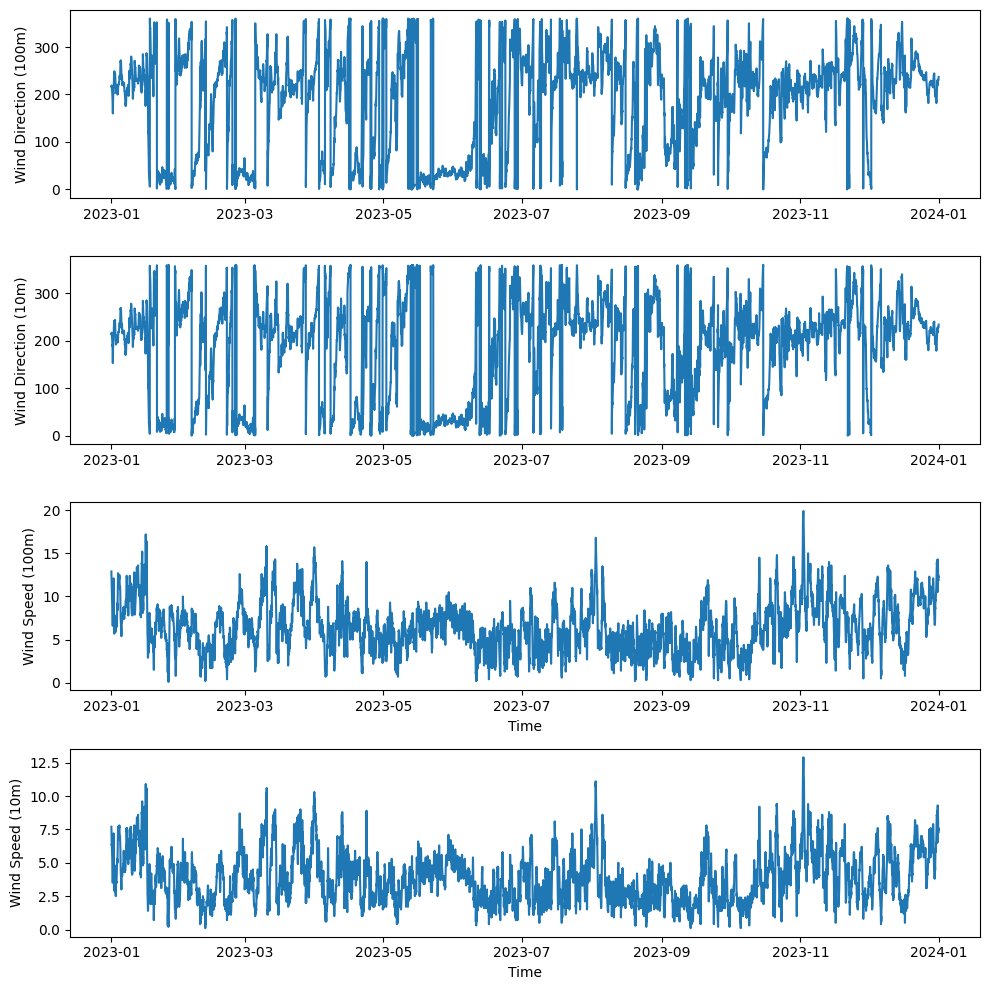

In [120]:
# Plot the wind-related features as a function of time
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
axs[0].plot(df['period_end'], df['wind_direction_100m'])
axs[0].set_ylabel('Wind Direction (100m)')
axs[1].plot(df['period_end'], df['wind_direction_10m'])
axs[1].set_ylabel('Wind Direction (10m)')

axs[2].plot(df['period_end'], df['wind_speed_100m'])
axs[2].set_ylabel('Wind Speed (100m)')
axs[2].set_xlabel('Time')

axs[3].plot(df['period_end'], df['wind_speed_10m'])
axs[3].set_ylabel('Wind Speed (10m)')
axs[3].set_xlabel('Time')

plt.tight_layout()
plt.show()

In [129]:
'''First for 100m'''

# Set the wind speed threshold (in m/s)
wind_threshold = 0.5

# Calculate the number of hours during which the wind was not blowing
no_wind_hours = ((df['wind_speed_100m'] < wind_threshold) & (df['wind_speed_100m'].notna())).sum()

# Calculate the total number of hours in the dataset
total_hours = len(df)

# Calculate the percentage of time with no wind
no_wind_percentage = (no_wind_hours / total_hours) * 100

# Print the results
print(f"Number of hours with no wind at 100m in atittude : {no_wind_hours}")
print(f"Total hours in the dataset: {total_hours}")
print(f"Percentage of time with no wind: {round(no_wind_percentage, 2)}%")
print(f"Percentage of time with blowing wind : {100 - (round(no_wind_percentage, 2))}%")

Number of hours with no wind at 100m of atittude : 30
Total hours in the dataset: 17520
Percentage of time with no wind: 0.17%
Percentage of time with blowing wind : 99.83%


In [131]:
'''Now for 10m'''

# Set the wind speed threshold (in m/s)
wind_threshold = 0.5

# Calculate the number of hours during which the wind was not blowing
no_wind_hours = ((df['wind_speed_10m'] < wind_threshold) & (df['wind_speed_10m'].notna())).sum()

# Calculate the total number of hours in the dataset
total_hours = len(df)

# Calculate the percentage of time with no wind
no_wind_percentage = (no_wind_hours / total_hours) * 100

# Print the results
print(f"Number of hours with no wind at 10m in attitude : {no_wind_hours}")
print(f"Total hours in the dataset: {total_hours}")
print(f"Percentage of time with no wind: {round(no_wind_percentage, 2)}%")
print(f"Percentage of time with blowing wind : {100 - (round(no_wind_percentage, 2))}%")


Number of hours with no wind at 10m in attitude : 45
Total hours in the dataset: 17520
Percentage of time with no wind: 0.26%
Percentage of time with blowing wind : 99.74%
